## Nome: Nicholas Lima Do Nascimento    
## Matrícula: 697

---

PARTE PRÁTICA

# Atividade – Análise de Erros em Medições Experimentais

Questão 1.

Um professor de Engenharia Química, realizou um experimento com seus alunos 
à respeito do calor específico da água. O experimento consiste em aquecer uma 
massa de água com um calorímetro e com isso medir a variação da temperatura, assim podendo calcular os
novos valores do calor específico. Porém, os resultados obtidos foram diferentes do 
valor exato do calor específico da água. Devido à isso o professor 
passou esses dados em uma tabela para você fazer um estudo sobre erros e métodos numéricos.

Importante citar que o valor do calor específico da água é de aproximadamente 4,186 kJ/(kg·K)


Os resultados dos alunos estão na tabela abaixo:

| Alunos               | Valor Medido (KJ) |
|-----------------------------------|---------------------|
| Karina             | 4.18           |
| Pedro        | 4.17               |
| Lívia               |     4.178           |
| Lucas      | 4.189               |
| Paulo            | 4.201             |
| Soned       | 4.187             |


Seu objetivo é analisar esses dados e calcular diferentes métricas de erro, 
utilizando Python e bibliotecas como **pandas**, **numpy** e **matplotlib**.

---


In [4]:
from IPython.display import display, Markdown
# Importando bibliotecas

#Analise de dados
import pandas as pd
import numpy as np

#Plotar gráficos
import matplotlib.pyplot as plt

In [2]:
#Tabela de dados
tabela = {
    "Alunos": [
        "Karina", "Pedro", "Livia",
        "Lucas", "Paulo",
        "Soned"
    ],
    "Valor Medido (K*J)": [4.18, 4.17, 4.178, 4.189, 4.201, 4.187]
}

dados = pd.DataFrame(tabela)
display(dados)

,Alunos,Valor Medido (K*J)
0,Karina,4.180
1,Pedro,4.170
2,Livia,4.178
3,Lucas,4.189
4,Paulo,4.201
5,Soned,4.187


### Parte 1 - Erro Absoluto, Erro Relativo e Erro Percentual

In [5]:
# Ordenando igual a atividade passada
df_ordenado = dados.sort_values(by='Valor Medido (K*J)', ascending=True).reset_index(drop=True)
print(df_ordenado)

# Valor teórico
valor_teorico = 4.186


   Alunos  Valor Medido (K*J)
0   Pedro               4.170
1   Livia               4.178
2  Karina               4.180
3   Soned               4.187
4   Lucas               4.189
5   Paulo               4.201


Calcule o Erro Absoluto, o Erro Relativo e o Erro Percentual dos valores medidos.

In [12]:
df_ordenado["Erro Absoluto"] = abs(valor_teorico - df_ordenado['Valor Medido (K*J)'])
df_ordenado["Erro Relativo"] = df_ordenado['Erro Absoluto'] / abs(df_ordenado['Valor Medido (K*J)'])
df_ordenado['Erro Percentual'] = df_ordenado["Erro Relativo"] * 100
print(df_ordenado)

   Alunos  Valor Medido (K*J)  Erro Absoluto  Erro Relativo  Erro Percentual
0   Pedro               4.170          0.016       0.003837         0.383693
1   Livia               4.178          0.008       0.001915         0.191479
2  Karina               4.180          0.006       0.001435         0.143541
3   Soned               4.187          0.001       0.000239         0.023883
4   Lucas               4.189          0.003       0.000716         0.071616
5   Paulo               4.201          0.015       0.003571         0.357058


**Formulário para cálculo de erros do calor específico**

- Erro Absoluto:  
$$E_a = |V_t - V_m|$$

- Erro Relativo:  
$$E_r = \frac{E_a}{|V_m|}$$

- Erro Percentual:  
$$E_p = E_r \times 100\%$$

Onde:  
- $V_t$ = valor teórico do calor específico (4,186 kJ/(kg·K))  
- $V_m$ = valor medido pelo aluno

### Parte 2 - Arredondamento e Truncamento

Um engenheiro de produção está desenvolvendo um sistema para controle de corte de peças metálicas.
O equipamento mede o comprimento das peças, mas as medições apresentam várias casas decimais, 
sendo necessário arredondar os valores para atender às especificações técnicas da indústria.
Esse engenheiro, a fim de deixar mais didático as suas medições, decidiu propor para você uma série de tarefas,
e você deverá auxiliá-lo nessa importante atividade.

As medidas coletadas pelo engenheiro estão anotadas na tabela:

| Peça              | Comprimento medido (cm) |
|-----------------------------------|---------------------|
| P1             | 12.3456           |
| P2        |           9.8765     |
| P3               |     15.5555          |
| P4      | 7.4999            |
| P5            | 10.0501            |

As terefas pedidas por eles são:

### 1 - Fazer um DataFrame para organização visual dos dados

In [36]:
pecas = ['P1', 'P2', 'P3', 'P4', 'P5']
comprimento = [12.3456, 9.8765, 15.5555, 7.499, 10.0501]

df = pd.DataFrame({'pecas':pecas, 'comprimento': comprimento})
df

,pecas,comprimento
0,P1,12.3456
1,P2,9.8765
2,P3,15.5555
3,P4,7.4990
4,P5,10.0501


### 2 - Preciso que arredonde todos os valores para 2 casas decimais, para me ajudar nos cálculos

In [37]:

df['arredondado'] = df['comprimento'].round(2)
df

,pecas,comprimento,arredondado
0,P1,12.3456,12.35
1,P2,9.8765,9.88
2,P3,15.5555,15.56
3,P4,7.4990,7.50
4,P5,10.0501,10.05


### 3 - Após isso, quero que trunque os valores para 1 casa decimal

In [38]:
import numpy as np

df['trunc'] = np.trunc(df['comprimento']*10)/10

df

,pecas,comprimento,arredondado,trunc
0,P1,12.3456,12.35,12.3
1,P2,9.8765,9.88,9.8
2,P3,15.5555,15.56,15.5
3,P4,7.4990,7.50,7.4
4,P5,10.0501,10.05,10.0


### 4 - Mostre para mim depois, o valor inteiro mais próximo

In [39]:
df['ceil'] = df['comprimento'].apply(np.ceil).astype(int)
print(df)

  pecas  comprimento  arredondado  trunc  ceil
0    P1      12.3456        12.35   12.3    13
1    P2       9.8765         9.88    9.8    10
2    P3      15.5555        15.56   15.5    16
3    P4       7.4990         7.50    7.4     8
4    P5      10.0501        10.05   10.0    11


### 5 - E me mostrar os resultados dentro de uma tabela

In [40]:
print(df)

  pecas  comprimento  arredondado  trunc  ceil
0    P1      12.3456        12.35   12.3    13
1    P2       9.8765         9.88    9.8    10
2    P3      15.5555        15.56   15.5    16
3    P4       7.4990         7.50    7.4     8
4    P5      10.0501        10.05   10.0    11





<span style="font-size:90%">

**Guia Rápido: Arredondamento e Truncamento**

- Arredondar para n casas decimais: `dados["Comprimento Medido (cm)"].round(0)`  
- Truncar para n casas decimais: `np.trunc(dados["Comprimento Medido (cm)"] * 10) / 10`  
- Arredondar para inteiro mais próximo: `dados["Comprimento Medido (cm)"].round(0).astype(int)`

</span>



## Parte Teórica

**Questão 1.** 

Julgue as afirmativas abaixo como V (Verdadeiro) ou F (Falso) e justifique as que forem Falsas.

1. É possível representar qualquer grandeza física em termos das unidades básicas da Física. (F)

2. O instrumento de medida escolhido para medir uma grandeza deve ser coerente com aquilo que se deseja medir. (V) 

3. A incerteza não precisa ser levada em consideração e não é necessária para compararmos os dados. (F)

4. O erro relativo é calculado dividindo o erro absoluto pelo valor teórico. (F)

5. O número de algoritmos significativos de uma grandeza é determinado pela sua incerteza. (V)

**Questão 2.** 

Quando você faz a medição de alguma grandeza, com um instrumento de medição qualquer, em qual conjunto cai a medida que você
obteve? 

Conjunto dos números Naturais, Inteiros, Racionais, Irracionais, Reais ou Complexos? Justifique sua resposta: Numeros Reais, pois os valores obtidos serão numeros fracionados, numeros com virgulas, podendo estender para milhares casas decimais podendo tender ao infino, assim sendo necessario o uso de aproximações

**Questão 3.**

Suponhamos que deseje medir o tamanho de um besouro.
Foi decidido também, o que caracteriza o tamanho do besouro, qual das alternativas abaixo melhor caracteriza a medida
do tamanho do besouro?

a) Entre 0 e 1 cm

b) Entre 1 e 2 cm

c) Entre 1,5 e 1,6 

d) Entre 1,54 e 1,56 (X)

e) Entre 1,546 e 1,547

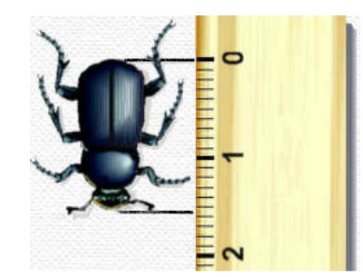

**Questão 4.**


Seja o número a = 4876 representado por a
′ = 4875,8 e seja o número 𝑦 = 12,7 representado por
𝑦
′ = 12,6. 

Pode-se dizer que ambos os números estão representados com a mesma precisão?


In [ ]:
# Resposta a
erro_absoluto = abs(4876-4875.8)
print(erro_absoluto)
erro_relativo = erro_absoluto/4876
print(erro_relativo)

0.1999999999998181
4.101722723540158e-05


In [48]:
# Resposta y
eb = abs(12.7 - 12.6)
print(eb)
er = eb/12.7
print(er)

0.09999999999999964
0.007874015748031468


Resposta:  A representação de 'a' está mais proxima em relação ao valor real, comparando os erros relativos.